## Ticker 24 Rest API call

Data here will show all cryptocurrencies actual prices.
- Peform operations on all cryptos with this endpoint

In [2]:
base = 'https://api.binance.com'
ticker24 = '/api/v1/ticker/24hr'
candlestick = '/api/v1/klines'
dateFormat = '%d/%m/%Y'

In [13]:
import urllib.request as r
import json
import pandas as pd
httpRes = r.urlopen(base + ticker24)
data = json.load(httpRes)
df = pd.DataFrame(data)

In [14]:
df.head()
original_data = df;

We do not need all the data, take only:
- closeTime
- highPrice
- lastPrice
- lowPrice
- openPrice
- prevClosePrice
- priceChange
- priceChangePercent
- quoteVolume
- symbol
- volume
- weightedAvgPrice

In [15]:
#processing data
ohlc_df = df[['closeTime', 'highPrice','lowPrice','openPrice', 'prevClosePrice','symbol']]

In [16]:
ohlc_df['closeTime'] = pd.to_datetime(ohlc_df['closeTime'], unit='ms')
ohlc_df.head()

C:\Users\cwu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,closeTime,highPrice,lowPrice,openPrice,prevClosePrice,symbol
0,2019-02-27 12:46:58.446,0.03627500,0.03527200,0.03563000,0.03563700,ETHBTC
1,2019-02-27 12:46:55.405,0.01188400,0.01159800,0.01180100,0.01180300,LTCBTC
2,2019-02-27 12:46:58.281,0.00257120,0.00245800,0.00246690,0.00246550,BNBBTC
3,2019-02-27 12:46:58.439,0.00239400,0.00233000,0.00235000,0.00235000,NEOBTC
4,2019-02-27 12:46:52.998,0.01535300,0.01499000,0.01517900,0.01518700,QTUMETH


In [17]:
ohlc_df.tail()

,closeTime,highPrice,lowPrice,openPrice,prevClosePrice,symbol
466,2019-02-27 12:46:58.365,0.00016842,0.00016000,0.00016444,0.00016477,ONGBTC
467,2019-02-27 12:46:58.444,0.64030000,0.61260000,0.62390000,0.62730000,ONGUSDT
468,2019-02-27 12:46:57.612,0.00012444,0.00011555,0.00012284,0.00012270,HOTBNB
469,2019-02-27 12:46:58.284,0.00119770,0.00112840,0.00115140,0.00115050,HOTUSDT
470,2019-02-27 12:46:57.177,0.01797000,0.01686000,0.01715000,0.01715000,ZILUSDT


In [18]:
bnb_check = lambda symbol: symbol.endswith('BNB')
bnb_market = ohlc_df.loc[ohlc_df['symbol'].apply(bnb_check)]

In [23]:
bnb_market.head()

,closeTime,highPrice,lowPrice,openPrice,prevClosePrice,symbol
99,2019-01-21 08:23:54.176,0.00000000,0.00000000,0.00000000,0.14920000,VENBNB
100,2019-02-27 12:46:30.298,0.00178400,0.00165800,0.00176100,0.00176300,YOYOBNB
101,2019-02-27 12:46:55.161,0.01021000,0.00934000,0.00934000,0.00933000,POWRBNB
106,2019-02-27 12:46:54.522,0.04435000,0.04256000,0.04359000,0.04373000,NULSBNB
109,2019-02-27 12:46:52.901,0.00229800,0.00199500,0.00225400,0.00225800,RCNBNB


### Filter penny coins (lower than 10 BNBs)

In [34]:
import ast
penny_coins = bnb_market[bnb_market['prevClosePrice'].apply(ast.literal_eval) < 10]

In [39]:
# check if values over 10 are displaying
penny_coins.sort_values('prevClosePrice').head()

,closeTime,highPrice,lowPrice,openPrice,prevClosePrice,symbol
311,2019-01-21 08:24:35.447,0.00000000,0.00000000,0.00000000,0.00002000,BCNBNB
454,2019-02-27 12:46:57.203,0.00009391,0.00008888,0.00009003,0.00009001,BTTBNB
468,2019-02-27 12:46:57.612,0.00012444,0.00011555,0.00012284,0.00012270,HOTBNB
267,2019-02-27 12:46:55.366,0.00018300,0.00017300,0.00018000,0.00018000,NCASHBNB
357,2019-02-27 12:44:47.778,0.00025700,0.00024500,0.00025300,0.00025300,SCBNB


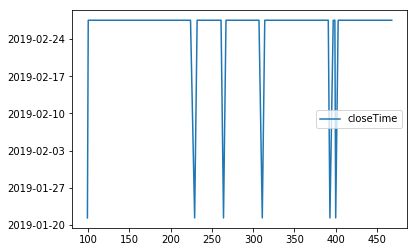

In [41]:
penny_coins.plot()